# Implementing Custom RandomSearchCV

In [1]:
#Importing packages and creating dataset


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


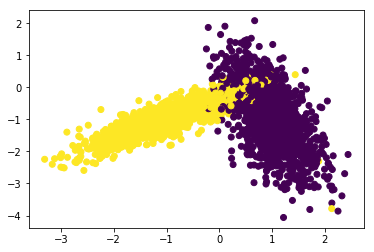

In [2]:
#Plotting scatter plot of test features

%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'black'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to divide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.divide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can divide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter

</pre>

3 50
[6, 7, 11, 19, 23, 29, 32, 34, 37, 47]


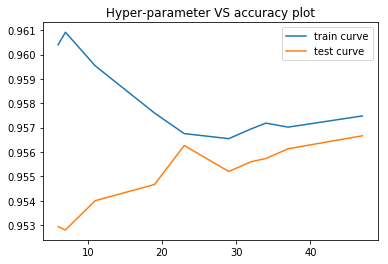

In [6]:
import random

#def RandomSearchCV(,classifier, param_range, folds):
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to divide the data and test our model
    
    #generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    low,high=param_range
    print(low,high)
    params=sorted(random.sample(range(low,high),10))
    print(params)
    
    
    #2.divide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can divide numbers from 0 to 100 into 3 groups 
      #group 1: 0-33, group 2:34-66, group 3: 67-100
    len_x_train=len(x_train)
    temp=int(len_x_train/folds)
    
    x_train_grps=[]
    y_train_grps=[]
    train_scores=[]
    test_scores=[]
   
    #Creating folds
    i=0
    j=1
    while(i<len_x_train):
        if j==folds:
            x_train_grps.append(x_train[i:])
            y_train_grps.append(y_train[i:])
        else:
            x_train_grps.append(x_train[i:i+temp])
            y_train_grps.append(y_train[i:i+temp])
        j+=1
        i+=temp
       
    
    for k in params:
        train_folds_accuracy=[0 for i in range(folds)]
        test_folds_accuracy=[0 for i in range(folds)]
        for i in range(folds):
            temp=np.array(x_train_grps[0:i]+x_train_grps[i+1:folds])
            
            X_train=temp[0]
           
            #Creating training data for that particular fold
            for _ in range(1,len(temp)):
                X_train=np.vstack((X_train,temp[_]))
    
            
            Y_train=np.ravel(np.array(y_train_grps[0:i]+y_train_grps[i+1:folds]))
          
            X_test=x_train_grps[i]
            Y_test=y_train_grps[i]
            
            
            #Training KNN
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)
            Y_predicted = classifier.predict(X_test)
             
            test_folds_accuracy[i]=accuracy_score(Y_test, Y_predicted)
            Y_predicted = classifier.predict(X_train)
            train_folds_accuracy[i]=accuracy_score(Y_train, Y_predicted)
            
        train_scores.append(np.mean(np.array(train_folds_accuracy)))
        test_scores.append(np.mean(np.array(test_folds_accuracy)))
        
    return train_scores,test_scores,params


clf = KNeighborsClassifier()    
train_score,cv_scores,params=RandomSearchCV(X_train,y_train,clf,(3,50), 10) 

plt.plot(params,train_score, label='train curve')
plt.plot(params,cv_scores, label='test curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

#Best K:23

In [4]:

def plot_decision_boundary(X1, X2, y, clf):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

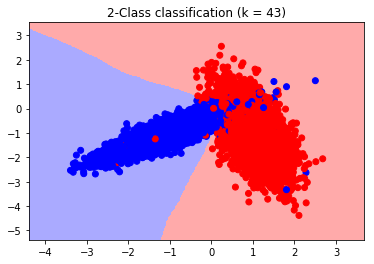

In [5]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 43)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)